# EDA - Single Variable Analysis (Univariate Analysis)

In this notebook we'll explore the techniques most commonly used to investigate features one by one in a dataset.

### Import Basic Packages & Data 

We will import the student grades dataset once again to explore various univariate analysis techniques.

In [3]:
#Basics
import numpy as np
import pandas as pd

In [6]:
# Import data to a pandas dataframe
df_grades = pd.read_csv('../../data_sets/student_grades_eda.csv')
df_grades.head()

# We will be working with the student grades EDA dataset. The target variable in this instance is the grade average of the student.

,student_ID,first_name,last_name,faculty,tuition,OH_participated,classes_skipped,grade_avg
0,20123456,John,Park,Arts,44191,0,5,B
1,20123457,Alex,Great,Science,32245,4,18,B
2,20123458,Sebastian,Taylor,Business,42679,6,7,B
3,20123459,Michael,Bay,Math,46478,15,2,A
4,20123460,Scott,Foster,Engineering,36784,5,8,A


### Descriptive Stats for Numeric Features

In the previous chapter, we discussed about the `describe` function to show a summary of stats for a numeric column. We initially used this function to clean our data, but this is also a very effective way to look at the distribution of our numeric column.

In [3]:
# Summary of statistics
df_grades['classes_skipped'].describe()

count    30.000000
mean      4.733333
std       3.027840
min       0.000000
25%       2.250000
50%       4.000000
75%       7.000000
max      10.000000
Name: classes_skipped, dtype: float64

What if we want to single out a specific statistical measure? We can use functions such as the `mean` function and others to get the specific statistical measure for each numerical feature.

In [4]:
# Manually return a statistic of interest 
print(df_grades['tuition'].mean())
print(df_grades['tuition'].quantile(0.25))
print(df_grades['tuition'].std())
print(df_grades['tuition'].var())

40307.066666666666
34824.75
5792.681196447648
33555155.44367816


### Basic packages for data visualization

In [2]:
# basic packages for visualization. 
import seaborn as sns
import matplotlib.pyplot as plt

### Basic Plots for Numeric Features

The simpliest yet most effective way to display findings and analysis is with the use of visuals. The two most common packages for visualizations are the `seaborn` and `matplotlib` packages. For the lesson, we will use the `seaborn` package to create our plots.

We will first go over a histogram, which displays the distribution of a numeric column. Histograms allow us to see the shape of the data to easily see insights such as where the data is most concentrated, how spread out the data is, and how skewed the data is. 

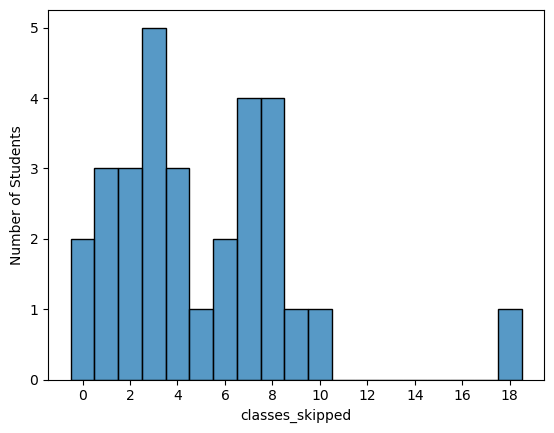

In [ ]:
# Show a basic histplot of the ClassesSkipped column 

from  matplotlib.ticker import MultipleLocator, MaxNLocator

# histplot = sns.histplot(data = df_grades, x ='classes_skipped', binwidth = 1)
histplot = sns.histplot(data = df_grades, x ='classes_skipped', discrete=True)
histplot.set_ylabel('Number of Students')
# Force the x-axis to show only integers
# histplot.xaxis.set_major_locator(MaxNLocator(integer=True))
histplot.xaxis.set_major_locator(MultipleLocator(2))

One other simple yet effective way to show a distribution and to identify outliers is through a box plot. Box plots allow us to see the quartiles of a distribution and allows us to easily see outliers. We normally consider anything outside of the whisker based on the IQR rule.

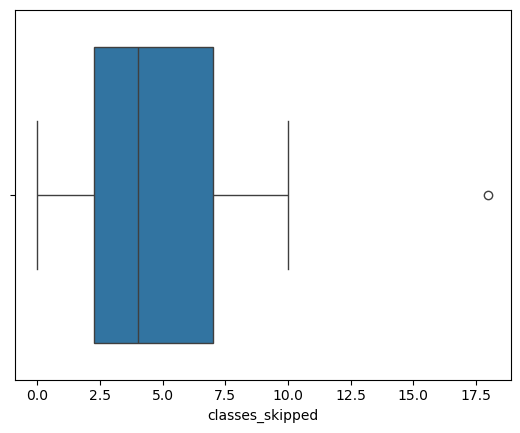

In [8]:
# Plot a box plot for the office hours participated column. 
boxplot = sns.boxplot(data = df_grades, x = 'classes_skipped')

One key note when looking for outliers based on the whiskers of the box plot is that the whiskers always assumes outliers based on the IQR rule. 

We can also combine the two above visuals into one by combining their axis together. For example, we will combine the x axis of both charts to neatly visualize the distributions.

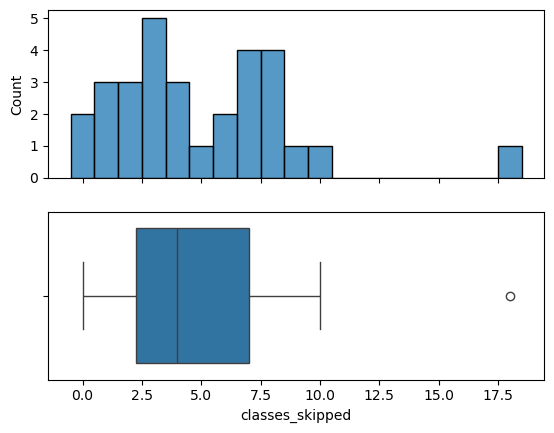

In [15]:
# Plot a histogram and blox plot together and make them share the same axis
fig, (hist, box) = plt.subplots(2, 1,sharex=True)
histplot = sns.histplot(data = df_grades, x ='classes_skipped', discrete = True, ax = hist)
boxplot = sns.boxplot(data = df_grades, x = 'classes_skipped', orient='h', ax = box)

Not only can we create visuals just by referencing the data in our dataframe, but we can create visuals by combining functions together and plot the result. For example, we can calculate the distribution of z-scores by combining the `mean` and `std` functions together.

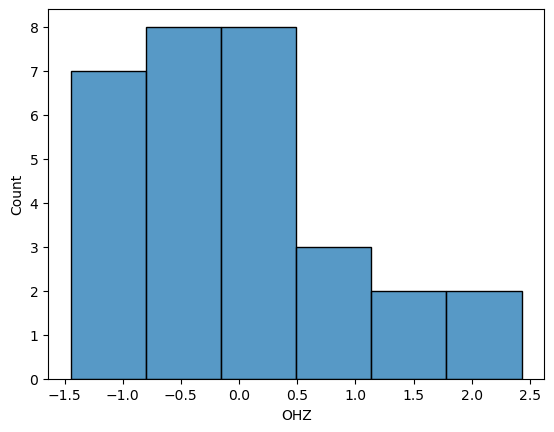

In [16]:
#Plot the Z scores of the values in a column
mean = df_grades['OH_participated'].mean()
std = df_grades['OH_participated'].std()
df_grades['OHZ'] = (df_grades['OH_participated'] - mean )/ std
histplot = sns.histplot(data = df_grades, x ='OHZ')

### Basic Plots for Categorical Features

So far, we have looked at EDA for numerical columns. But what about categorical columns? We will now look at various ways we can conduct EDA for these features.

One of the most basic plots for categorical features is the use of the `countplot` function. This allows us to see the count of each unique categorical value in the feature.

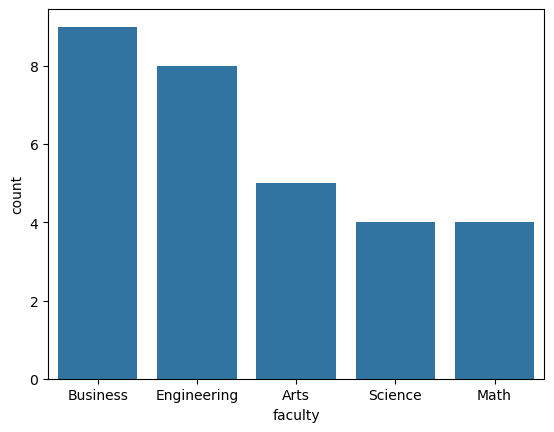

In [17]:
# Plot the count of the categories in the Faculty column and then order them.
# faculty_counts = df_grades['faculty'].value_counts().index
countplot = sns.countplot(data = df_grades, x ='faculty', order = df_grades['faculty'].value_counts().index)

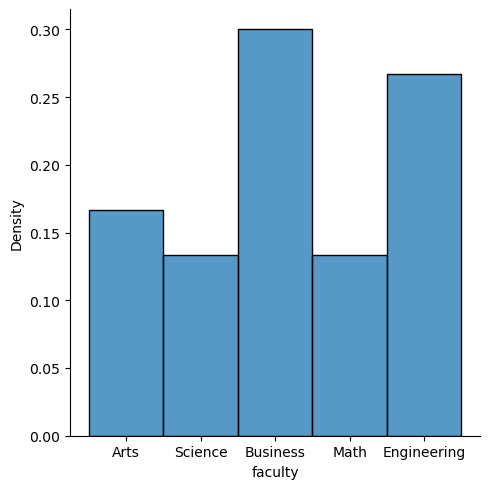

In [18]:
# Plot the percentage of observations in each category and order by frequency
displot = sns.displot(data = df_grades, x ='faculty', stat="density" )

Another way of displaying categorical values is with the use of pie charts. 

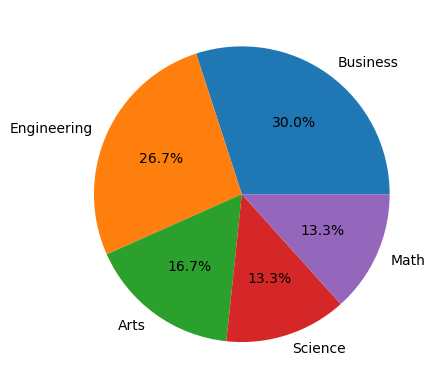

In [19]:
# Plotting via pie chart
pie_data = df_grades['faculty'].value_counts()
plt.pie(pie_data.values, labels = pie_data.index, autopct="%.1f%%")
plt.show()

However, we do not recommend pie charts with large amount of unique values since it can look quite messy, but it can be an option that can cater to a particular audience.

### Exercise 1 - Visuals for Categorical Features

We will now import our data Indian Car Dataset. This dataset has the information of cars sold as well as their attributes. We will first look at creating visuals for the categorical features in this dataset.

In [23]:
# import data
df_cars = pd.read_csv('../../data_sets/indian_cars_dataset.csv')
df_cars.head()

,ending_price,starting_price,reviews_count,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,fuel_tank_capacity,no_cylinder,rating,seating_capacity,fuel_type,engine_displacement,transmission_type,body_type,car_name
0,583000,399000,51,89.0,3500,65.71,5500,27.0,3,4.5,5.0,Petrol,998,Automatic,Hatchback,Maruti Alto K10
1,1396000,799000,86,136.8,4400,101.65,6000,48.0,4,4.5,5.0,Petrol,1462,Automatic,SUV,Maruti Brezza
2,1603000,1353000,242,300.0,2800,130.00,3750,57.0,4,4.5,4.0,Diesel,2184,Automatic,SUV,Mahindra Thar
3,2458000,1318000,313,450.0,2800,182.38,3500,60.0,4,4.5,7.0,Diesel,2198,Automatic,SUV,Mahindra XUV700
4,2390000,1199000,107,400.0,2750,172.45,3500,57.0,4,4.5,7.0,Diesel,2198,Automatic,SUV,Mahindra Scorpio-N


Create a bar chart to display the transmission type of SUVs

Task:
- Find the count of each transmission type for SUVs
- Create a bar chart displaying the above

Text(0.5, 0, 'Transmission Type for SUV Cars')

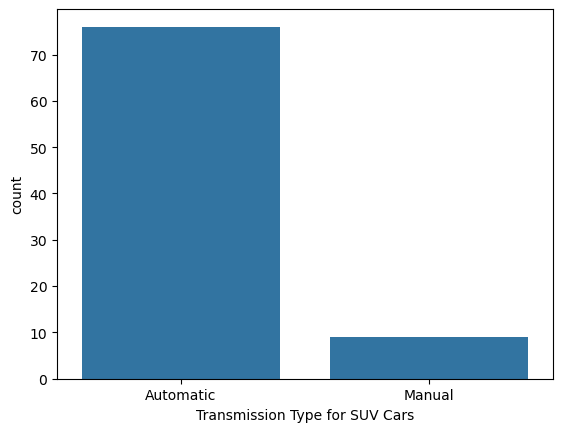

In [32]:
suv_cars = df_cars[df_cars['body_type'] == 'SUV']
barchart = sns.countplot(data = suv_cars, x ='transmission_type', order = suv_cars['transmission_type'].value_counts().index)
barchart.set_xlabel('Transmission Type for SUV Cars')

In [28]:
# Find the count of each transmission type for SUVs
df_cars[df_cars['body_type'] == 'SUV']['transmission_type'].value_counts()

transmission_type
Automatic    76
Manual        9
Name: count, dtype: int64

### Exercise 2 (Basic) - Visuals for Numeric Features

Create two visuals that displays the distribution of the starting price of cars based on transmission type. Then find the average starting price for each transmission type

Task:
- Plot the distribution of starting price for each transmission type in a histogram
- Print the average starting price for each transmission type

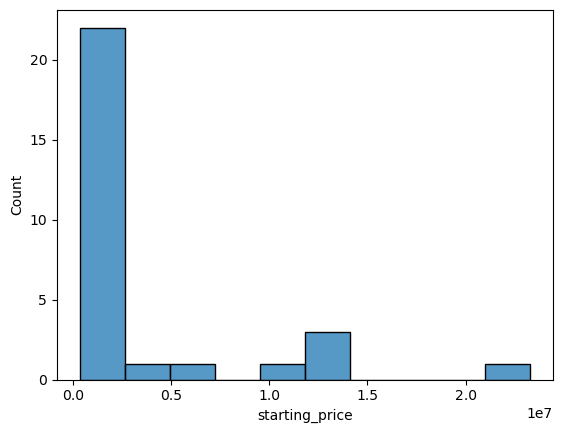

In [33]:
# Plot the distribution for manual transmission
histplot = sns.histplot(data = df_cars[df_cars['transmission_type'] == 'Manual'], x = 'starting_price', bins = 10)

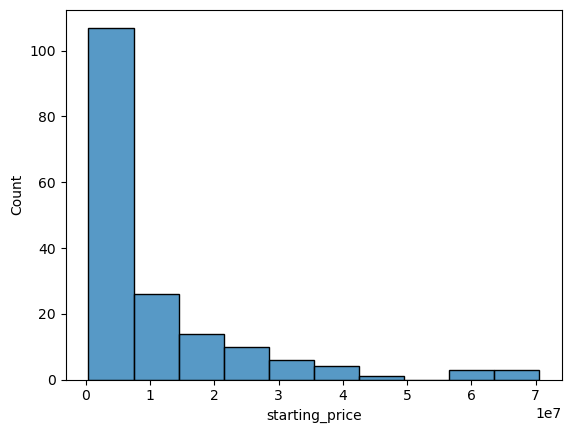

In [34]:
# Plot the distribution for automatic transmission
histplot = sns.histplot(data = df_cars[df_cars['transmission_type'] == 'Automatic'], x = 'starting_price', bins = 10)

In [35]:
# Calculate mean starting price of each transmission type
print('Automatic:', df_cars[df_cars['transmission_type'] == 'Automatic']['starting_price'].mean())
print('Manual:', df_cars[df_cars['transmission_type'] == 'Manual']['starting_price'].mean())

Automatic: 10446344.827586208
Manual: 3427413.793103448
